
# **Code Validation for Binomial Functions**

This notebook generates test cases for the following functions defined in `binomial_cis/binomial_helper.py`
- `binom_coeff()`
- `binom_pmf()`
- `binom_cdf()`.

In order to speed up the computation of expected shortage, I compiled the functions above. Compiling these functions with Numba required implementing them from scratch instead of using SciPy. This notebook tests the accuracy and speed of these functions compared to their SciPy versions.


In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '..')

### **`binom_coeff()`**
Here we see little to no error compared with the SciPy function. However, we see some mild slowdown. We must accept this slowdown if we wish to use Numba, as Numba doesn't compile SciPy functions.

Minimum % Error: 0
Maximum % Error: 0
Minimum % Slowdown: 0
Maximum % Slowdown: 8


Text(0.5, 1.0, 'Distribution of Percent Slowdown')

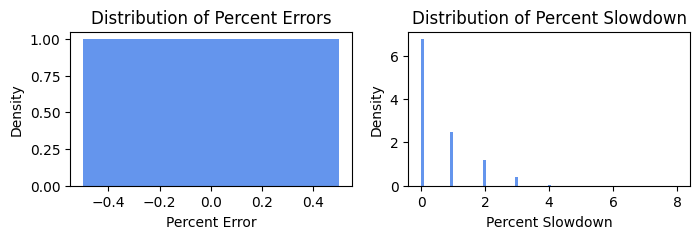

In [2]:
from scipy.special import binom
from binomial_cis import binom_coeff

num = 10_000 # number of MC samples
ns = np.random.randint(1, high=100, size=num) 
ks = np.array([np.random.randint(0, high=n) for n in ns])

slowdown = np.zeros_like(ns)
errors = np.zeros_like(ns)

for i in range(num):
    start = time.time()
    mine = binom_coeff(ns[i], ks[i])
    t_mine = time.time() - start

    start = time.time()
    scipy = binom(ns[i], ks[i])
    t_scipy = time.time() - start

    slowdown[i] = (t_mine - t_scipy) / t_scipy
    errors[i] = (mine - scipy) / scipy

print("Minimum % Error:", np.min(errors))
print("Maximum % Error:", np.max(errors))

print("Minimum % Slowdown:", np.min(slowdown))
print("Maximum % Slowdown:", np.max(slowdown))

plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.hist(errors, density=True, color="cornflowerblue", bins="auto")
plt.xlabel("Percent Error")
plt.ylabel("Density")
plt.title("Distribution of Percent Errors")

plt.subplot(1,2,2)
plt.hist(slowdown, density=True, color="cornflowerblue", bins="auto")
plt.xlabel("Percent Slowdown")
plt.ylabel("Density")
plt.title("Distribution of Percent Slowdown")

### **`binom_pmf()`**
Here we see no error or slowdown compared to the SciPy function.

Minimum % Error: 0
Maximum % Error: 0
Minimum % Slowdown: 0
Maximum % Slowdown: 0


Text(0.5, 1.0, 'Distribution of Percent Slowdown')

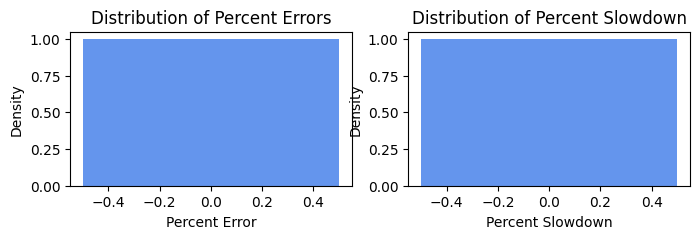

In [3]:
from scipy.stats import binom
from binomial_cis import binom_pmf

num = 10_000 # number of MC samples
ns = np.random.randint(1, high=100, size=num) 
ks = np.array([np.random.randint(0, high=n) for n in ns])
ps = np.random.rand(num)

slowdown = np.zeros_like(ns)
errors = np.zeros_like(ns)

for i in range(num):
    start = time.time()
    mine = binom_pmf(ks[i], ns[i], ps[i])
    t_mine = time.time() - start

    start = time.time()
    scipy = binom.pmf(ks[i], ns[i], ps[i])
    t_scipy = time.time() - start

    slowdown[i] = (t_mine - t_scipy) / t_scipy
    errors[i] = (mine - scipy) / scipy

print("Minimum % Error:", np.min(errors))
print("Maximum % Error:", np.max(errors))

print("Minimum % Slowdown:", np.min(slowdown))
print("Maximum % Slowdown:", np.max(slowdown))

plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.hist(errors, density=True, color="cornflowerblue", bins="auto")
plt.xlabel("Percent Error")
plt.ylabel("Density")
plt.title("Distribution of Percent Errors")

plt.subplot(1,2,2)
plt.hist(slowdown, density=True, color="cornflowerblue", bins="auto")
plt.xlabel("Percent Slowdown")
plt.ylabel("Density")
plt.title("Distribution of Percent Slowdown")

### **`binom_cdf()`**
Here we see no error and very mild slowdown compared to the SciPy function.

Minimum % Error: 0
Maximum % Error: 0
Minimum % Slowdown: 0
Maximum % Slowdown: 3


Text(0.5, 1.0, 'Distribution of Percent Slowdown')

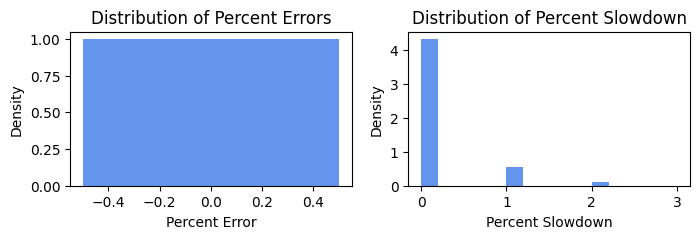

In [4]:
from scipy.stats import binom
from binomial_cis import binom_cdf

num = 10_000 # number of MC samples
ns = np.random.randint(1, high=100, size=num) 
ks = np.array([np.random.randint(0, high=n) for n in ns])
ps = np.random.rand(num)

slowdown = np.zeros_like(ns)
errors = np.zeros_like(ns)

for i in range(num):
    start = time.time()
    mine = binom_cdf(ks[i], ns[i], ps[i])
    t_mine = time.time() - start

    start = time.time()
    scipy = binom.cdf(ks[i], ns[i], ps[i])
    t_scipy = time.time() - start

    slowdown[i] = (t_mine - t_scipy) / t_scipy
    errors[i] = (mine - scipy) / scipy

print("Minimum % Error:", np.min(errors))
print("Maximum % Error:", np.max(errors))

print("Minimum % Slowdown:", np.min(slowdown))
print("Maximum % Slowdown:", np.max(slowdown))

plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.hist(errors, density=True, color="cornflowerblue", bins="auto")
plt.xlabel("Percent Error")
plt.ylabel("Density")
plt.title("Distribution of Percent Errors")

plt.subplot(1,2,2)
plt.hist(slowdown, density=True, color="cornflowerblue", bins="auto")
plt.xlabel("Percent Slowdown")
plt.ylabel("Density")
plt.title("Distribution of Percent Slowdown")